# Identifying the chirp mass of GW150914 (Solutions)

Welcome! 
This IPython notebook provides a hands on demo to measure the chirp mass of the very first gravitational wave discovery GW150914.

This notebook is modified from https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb v0.6; August 2019

This is an example of solutions to the chirp mass demo worksheet (mcdemo_worksheet.ipynb) found in the same folder as this notebook. 
Your codes do not necessarily have to match the solutions here, but your codes should be able to get the same results.  

## Setup

#### Import some packages
Here are some python packages that are useful for working with gravitational wave data. You can look up the individual packages on the internet to find out what each of the libraries let you do.

In [1]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from gwpy.timeseries import TimeSeries
import numpy

#### Set the GPS time
GPS time is used to specify what data you want to work with. Set the coalescence time (1126259462.4) as your starting GPS time (t0). 

In [2]:
# -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914 coalescence time

#### Set detector
Select the detector (as H1, L1, or V1) that you want to analyze the data for. 
Hint: Choose the detector that detected the gravitational wave with the "loudest" signal, which in this case was H1.  

In [3]:
#-- Choose detector as H1, L1, or V1. We will choose H1 since the signal was the "loudest" in H1.
detector = 'H1'

#### Query and download data file
Unless you have already, you have to import [this library](https://gwosc.readthedocs.io/en/latest/reference/gwosc.locate.get_urls.html) to get urls from GWOSC (Gravitational Wave Open Science Center).
Use it to get the url to the data for GW150914. You can use t0 for the start and stop times in get_urls. The print statement is useful to track if your code is working. 

In [4]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5


#### Plot the raw time-series data
Now that you have the unfiltered strain data, plot it near the coalescence time to see what it looks like.

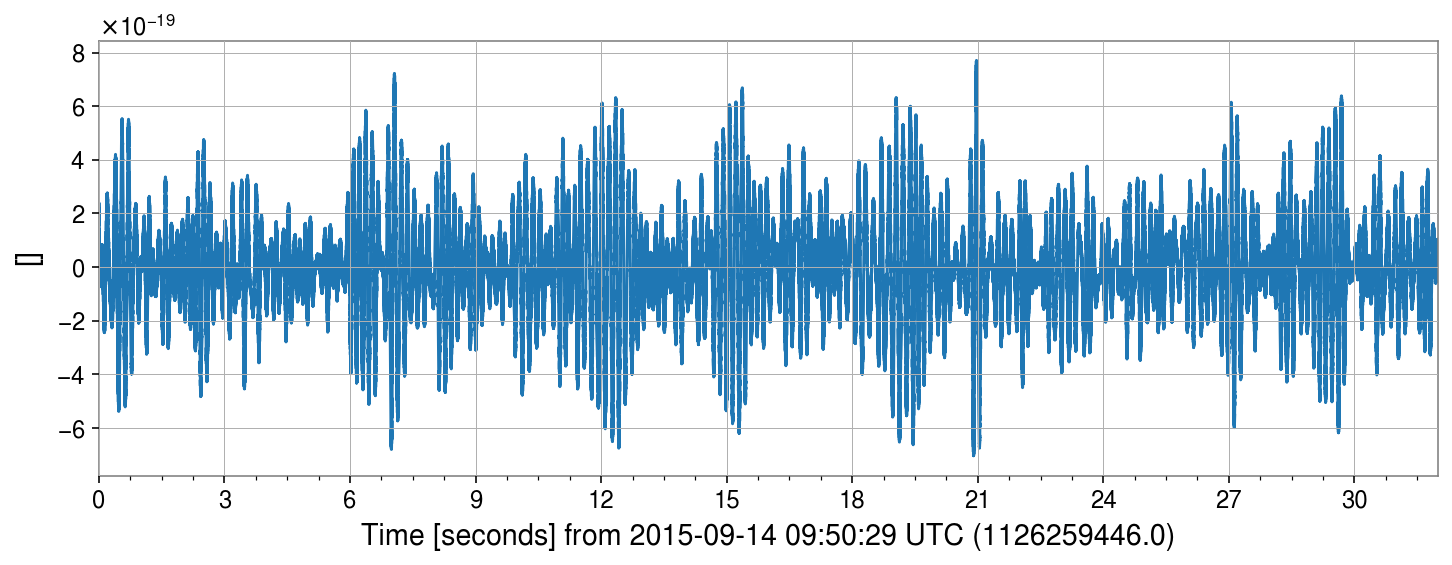

In [5]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

## Filtering the data - first step - understand the frequency content of the signal and the noise.

Notice how noisy the raw data is. Nothing here looks particularly like a gravitational wave signal. Recall, however, that it is possible to isolate important signals in the data through filtering. Here we will motivate the band pass filter appropriate for a GW.

#### The frequency content of a GW signal
To understand what might be a good filter, recall that the amplitude as a function of frequency for gravitational wave signals is well described as

$|\tilde{h}(f)| \sim f^{-7/6}$

The typical amplitude of a GW in f follows this negative power law function of $f$.  If we plot this on a logarithmically scaled axis, it will be a straight line with slope = -7/6 because: 

$\ln (f^{-7/6}) = -\frac{7}{6} \ln (f)$

------------------------------

# Exercise 1

## Problem:
Compare the gravitational wave frequency content to the noise frequency content.

#### What we want to code: 
We want to plot the amplitude of the data, `d`, as a function of the frequency, `f`. 
The plot should have `f` as the x-values and `d` as the y-values. 

#### Hint 1: 
Start by assigning the data amplitude to `d`, and assigning the frequency to `f`.

In [6]:
d = strain.asd(fftlength=8)
f = numpy.arange(len(d)) * d.df

#### Hint 2: 
Write some code that plots `d` versus `f` using a log-log plot. Use xlimits between 10 and 1500, and ylimits between 1e-24 and 1e-19. You can look up what matplotlib.pyplot (that you imported as `plt` earlier) can do. Complete the code below:

(10, 1500)

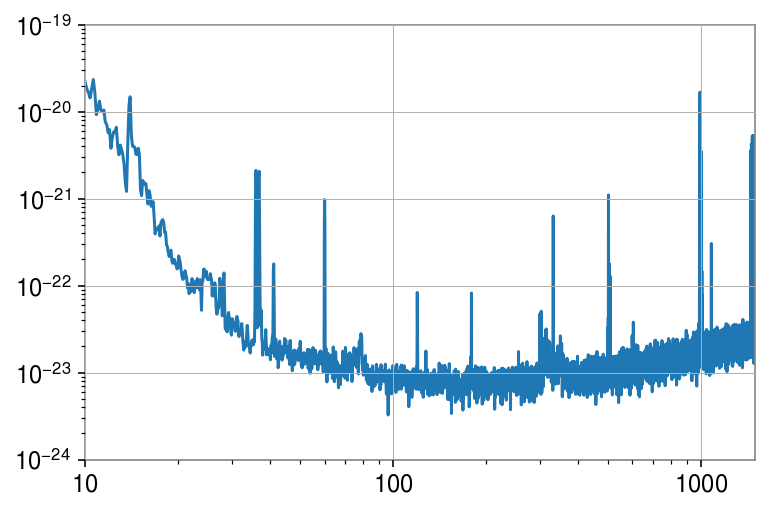

In [8]:
plt.loglog(f,d)
plt.ylim([1e-24, 1e-19])
plt.xlim([10,1500])

#### Hint 3: 
It is important for your plots to have axes labels so that others know what you have plotted. 
In the code you wrote to create a plot in Hint 2, add some code to give both x and y axes appropriate labels.

Text(0, 0.5, 'amplitude')

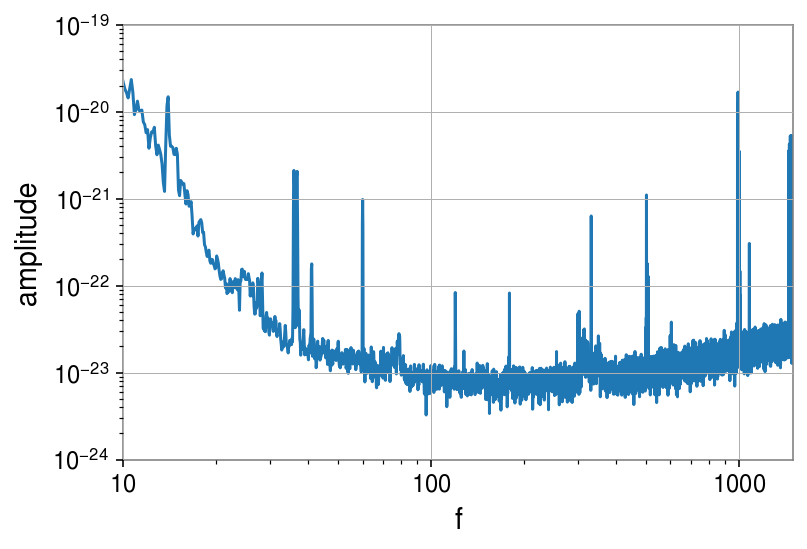

In [10]:
plt.loglog(f,d)
plt.ylim([1e-24, 1e-19])
plt.xlim([10,1500])
plt.xlabel('f')
plt.ylabel('amplitude')

#### Hint 4:
In the code you wrote to create a plot in Hint 2, add some code to __plot the relationship of `d` and `f`, `y=5e-21 * f**(-7/6)`.__ Remember: This represents the amplitude of a typical GW, so it should add a straight line to the graph.

/usr/local/anaconda3/envs/igwn-38/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


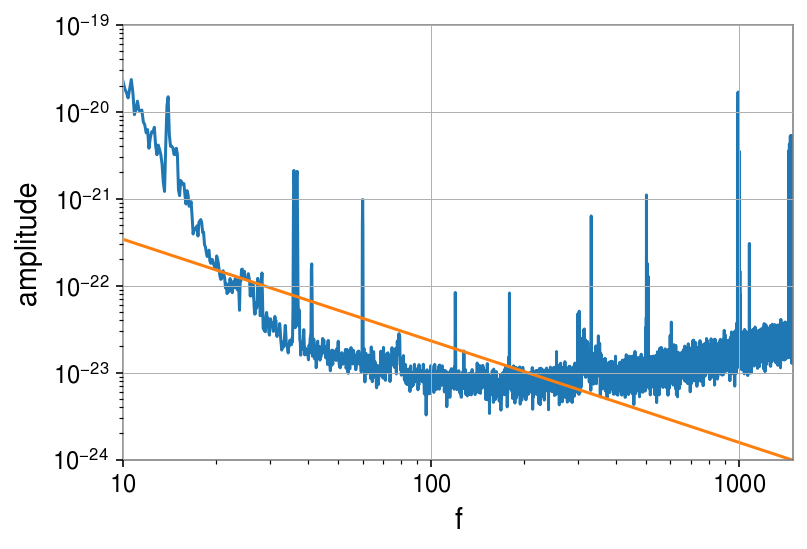

In [11]:
plt.loglog(f,d)
plt.ylim([1e-24, 1e-19])
plt.xlim([10,1500])
plt.xlabel('f')
plt.ylabel('amplitude')
plt.loglog(f, 5e-21 * f**(-7/6))

------------------------------

#### Visualize the whitened and band-passed data between 20 and 200 Hz
From the plot you have made in Exercise 1, it seems that frequencies between 20 and 200 Hz might be promising for typical gravitational waves from a binary black hole.  Next we will filter data to isolate those frequencies.

In [12]:
# -- Filter the data to isolate frequencies between 20 and 200 Hz
bp_data = strain.whiten().bandpass(20, 200)

------------------------------

# Exercise 2

## Problem: 
Visualize the portion of the data that contains the gravitational wave signal. 

#### What we want to code: 
Plot the data over a 100ms (0.1s) range from `t0-0.065` to `t0+0.035`

#### Hint 1: 
Use the plot() method of bp_data to plot the time series between `t0-0.065` to `t0+0.035`.
The time comes on the x-axis so use xlimits of `t0-0.065` and `t0+0.035`.

(1126259462.335, 1126259462.4350002)

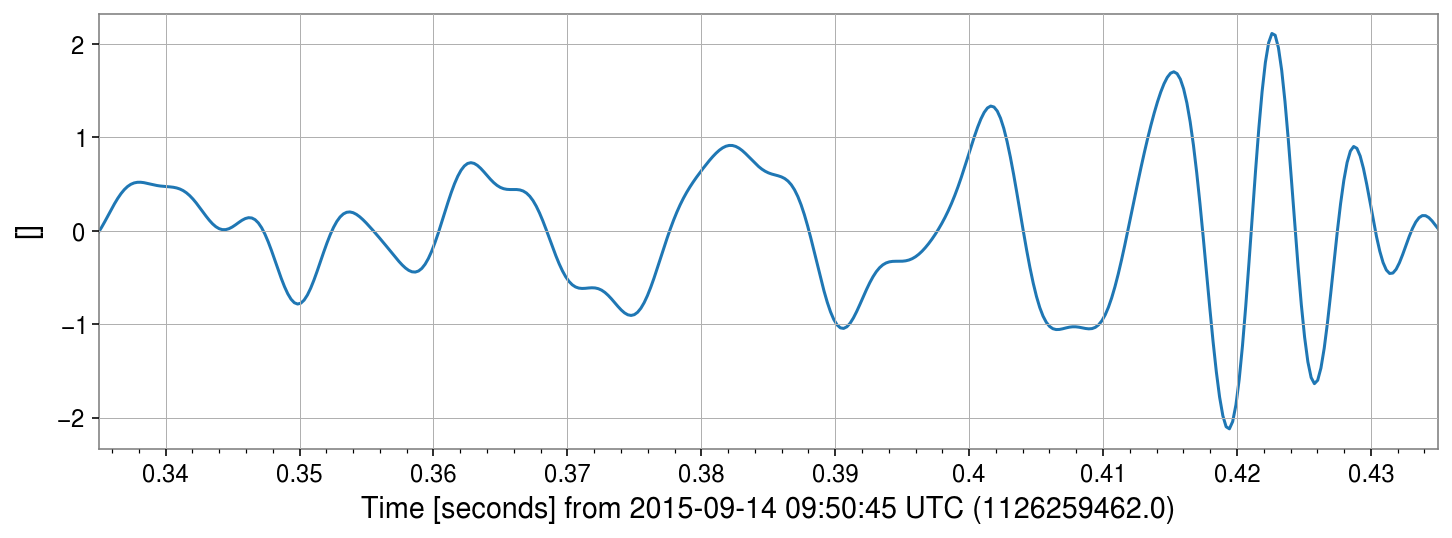

In [13]:
fig3 = bp_data.plot()
plt.xlim(t0-0.065, t0+0.035)

------------------------------

# Exercise 3

## Problem:
Identify the gravitational wave cycles (positive peaks) from the graph.

#### More details before you start working:
We want to find trends that are generally increasing in amplitude and frequency over adjacent cycles until the peak. We expect this because merging black holes orbit faster and faster until they finally merge.

#### Before you code:
1. By-eye, start by identifying the peak with the largest positive amplitude.
2. Go left from this point, identifying each peak until the trend is no longer decreasing over a few cycles. Don't focus on the small ups and downs, but rather the cycles that appear to go above and below y = 0.
3. Record the time (horizontal) values of these points as t values. You should find 6 of them. Only focus on the positve y-value peaks, and ignore the negative y-value troughs. Try to estimate the time values to three decimal places (all should start with 0.) 

#### What we want to code:
Store the time values of all six peaks in an array called `t`.
Make sure your list is in order from smallest to largest value.

#### Hint 1:
You can use `sorted` to make sure your list is in order from smallest to largest.
Your list `t` should be in the format like below. (`#` is used to comment out a line, telling python to ignore it when you execute the cell).

In [14]:
# t = sorted([t1, t2, t3, t4, t5, t6])
t = sorted([0.423, 0.415, 0.405, 0.383, 0.363, 0.337])

------------------------------

# Exercise 4

## Problem: 
Find the relationship between the instantaneous period, the time before coalescence, and the chirp mass.

### Part A:

#### More details before you start working:
In order to compute the chirp mass $\mathcal{M}$ $M_\odot$ (the mass of our Sun), we will use this approximate relationship between the frequency of the waveform and the chirp mass:

$f=\frac{1}{\pi \mathcal{M} (M_\odot G / c^3)}\left[ \frac{5}{256} \frac{\mathcal{M} (M_\odot G / c^3)}{\Delta t} \right]^{3/8}$


Where $T$ is the period of the waveform, $G = 6.7 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$ (the gravitational force constant), and $c = 3 \times 10^8$ m s$^{-1}$ (the speed of light).

Next we use the relationship between frequency, $f$ and period, $T$

$f = 1 / T$

We can then rearange the two equations above to get

$\frac{\mathcal{M}}{ M_\odot} = 3000 \, T^{8/5} \Delta t^{-3/5}$

which gives the chirp mass in units of solar masses (typically used in our field)

#### What we want to code (part 1):
Assume that the final peak represents the time of coalescence, which would be given by `t[-1]` (the `[-1]` selects the last value in the list).
Construct an array of "time before coalescence" by subtracting the first 5 peak times from the final peak time `t[-1]`. Call this new array `dt`

#### What we want to code (part 2):
Find the instantaneous period, `T` by finding the time difference between each pair of adjacent peaks.
You can use the `numpy.diff()` function in numpy to find the difference between the peak times. 
Try to write your own function that gives you the same result as `numpy.diff()`.

#### Hint 1:
In both cases, your new arrays `dt` and `T` will have 5 entries instead of 6 entries.
Complete the code below:

In [19]:
dt = t[5] - numpy.array(t[0:5])
T = numpy.diff(t)

### Part B

#### What we want to code:
Next we want to make a function that gives us the chirp mass from the two arrays `dt` and `T` that you made in Part A. 
The function will return another array with **5** estimates of the chirp mass since there are 5 entries for each array. You will use the equation $\mathcal{M} = 3000 \, T^{8/5} \Delta T^{-3/5}$. **Make a function called `chirpmass` that takes arguments `T` and `dt`.**

#### Hint 1:
Complete the code below:

In [20]:
def chirpmass(T, dt):
    return 3000. * T**(8/5.) * dt**(-3/5.)

### What we want to code:
Use the function you defined above to compute an array of chirpmasses `M` from your imput arrays, `dt` and `T`

#### Hint 2: 
Complete the code below:

In [21]:
M = chirpmass(T, dt)

### Part C

#### More details before you start working:
GW150914 has only one chirp mass, but each of these points gives us an estimate.  We should interpret the result as 5 estimates of its chirpmass with uncertainties caused both by the LIGO data **and** by our measurement using the plot. We can take an average or mean value to get our best estimate. 

#### What we want to code:
Compute the mean value of the chirp mass estimates

#### Hint 1:
Numpy provides a function called `numpy.mean` to calculate this. Use it here:

In [18]:
numpy.mean(M)

32.0559514531287

### Part D
Finally, compare the mean value of chirp mass estimates that you got in Part C to the estimate in [this paper](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.116.061102).